In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [88]:
strat_train = pd.read_csv('final_75%_train.csv')

In [90]:
def model_prep(strat_train):
    strat_train = strat_train.sort_values(by = 'User', axis=0, ascending=True)
    strat_train = strat_train.reset_index()
    strat_train = strat_train.drop(['Unnamed: 0', 'User', 'index', 'Card'], axis = 1)
    # Location = pd.get_dummies(strat_train['Merchant State'])
    # strat_train = pd.concat([strat_train, Location], axis=1, join="inner")
    # strat_train = strat_train.drop('Merchant State', axis = 1)
    column_to_reorder = strat_train.pop('Is Fraud?')
    strat_train.insert(len(strat_train.columns), 'Is Fraud?', column_to_reorder)
    return strat_train  

In [91]:
c_train = model_prep(strat_train)

In [92]:
c_train.columns

Index(['Time', 'Use Chip', 'Gender', 'Num Credit Cards', 'Card Brand',
       'Card Type', 'Has Chip', 'Cards Issued', 'Card Age', 'PC_Income_binned',
       'SQR_Debt_binned', 'PIN_Binned', 'Year_Income_binned',
       'SQR_Credit_binned', 'Log_Amount_binned', 'FICO binned', 'Error',
       'Current_Age_Binned', 'MCC_Binned', 'Unemploy_Bin', 'Is Fraud?'],
      dtype='object')

In [93]:
X = c_train.iloc[:,:-1]
y = c_train.iloc[:,-1]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [141]:
X_train.head()

,Time,Gender,Num Credit Cards,Card Brand,Card Type,Has Chip,Cards Issued,Card Age,SQR_Debt_binned,PIN_Binned,Year_Income_binned,SQR_Credit_binned,FICO binned,Error,Unemployment Rate,Transaction Type,Transaction Amount,Merchant Type,Income,Cardholder Age
42253,0.0,1,5,2,2,1,1,31,0,1,0,0,4,1,2,2,0,4,2,5
8384,1.0,0,5,2,1,0,1,92,0,1,0,1,3,1,0,2,0,4,1,6
71511,0.0,0,1,2,1,1,2,81,3,1,0,1,4,1,0,2,3,6,2,5
55359,1.0,1,5,2,1,1,2,150,0,1,0,2,2,1,1,0,3,6,4,6
51266,1.0,0,3,2,1,0,2,8,1,2,0,1,3,1,1,2,2,4,2,2


In [139]:
X_test['Unemployment Rate'] = X_test['Unemploy_Bin']
X_test['Transaction Type'] = X_test['Use Chip']
X_test['Transaction Amount'] = X_test['Log_Amount_binned']
X_test['Merchant Type'] = X_test['MCC_Binned']
X_test['Income'] = X_test['PC_Income_binned']
X_test['Cardholder Age'] = X_test['Current_Age_Binned']
X_test = X_test.drop(['Unemploy_Bin','Use Chip','Log_Amount_binned','MCC_Binned','PC_Income_binned','Current_Age_Binned'], axis = 1)

In [140]:
X_train['Unemployment Rate'] = X_train['Unemploy_Bin']
X_train['Transaction Type'] = X_train['Use Chip']
X_train['Transaction Amount'] = X_train['Log_Amount_binned']
X_train['Merchant Type'] = X_train['MCC_Binned']
X_train['Income'] = X_train['PC_Income_binned']
X_train['Cardholder Age'] = X_train['Current_Age_Binned']
X_train = X_train.drop(['Unemploy_Bin','Use Chip','Log_Amount_binned','MCC_Binned','PC_Income_binned','Current_Age_Binned'], axis = 1)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import plot_tree

In [142]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_O_resampled1, y_O_resampled1 = ros.fit_resample(X_train, y_train)

In [143]:
# xgboost - binned unemployment and label encoded transaction type (chip, swipe, online)
model1 = xgb.XGBClassifier().fit(X_O_resampled1, y_O_resampled1)

In [144]:
y_pred1 = model1.predict(X_test)

In [145]:
confusion_matrix(y_test, y_pred1)

array([[20405,  2020],
       [ 1016,  5681]])

In [146]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     22425
         1.0       0.74      0.85      0.79      6697

    accuracy                           0.90     29122
   macro avg       0.85      0.88      0.86     29122
weighted avg       0.90      0.90      0.90     29122



In [147]:
plt.rcParams.update({'figure.figsize': (12.0, 12.0)})
plt.rcParams.update({'font.size': 14})

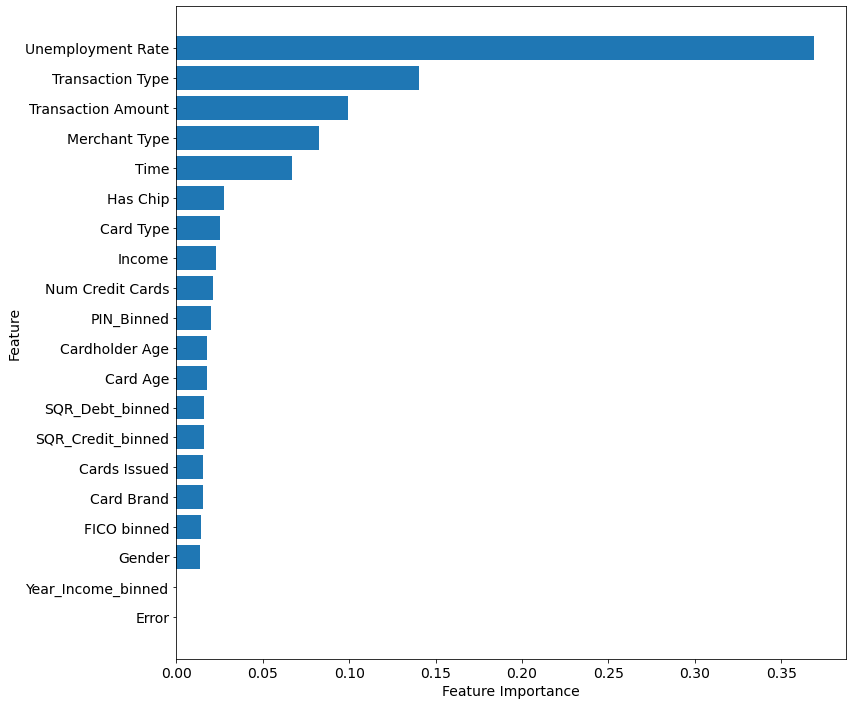

In [148]:
sorted_idx = model1.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], model1.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.savefig('XGBoost_Feature_Importance.png')

In [74]:
# xgboost
model1 = xgb.XGBClassifier().fit(X_O_resampled1, y_O_resampled1)

In [75]:
y_pred1 = model1.predict(X_test)

In [76]:
confusion_matrix(y_test, y_pred1)

array([[14061,   776],
       [  374,  1591]])

In [77]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     14837
         1.0       0.67      0.81      0.73      1965

    accuracy                           0.93     16802
   macro avg       0.82      0.88      0.85     16802
weighted avg       0.94      0.93      0.93     16802



In [78]:
plt.rcParams.update({'figure.figsize': (12.0, 12.0)})
plt.rcParams.update({'font.size': 14})

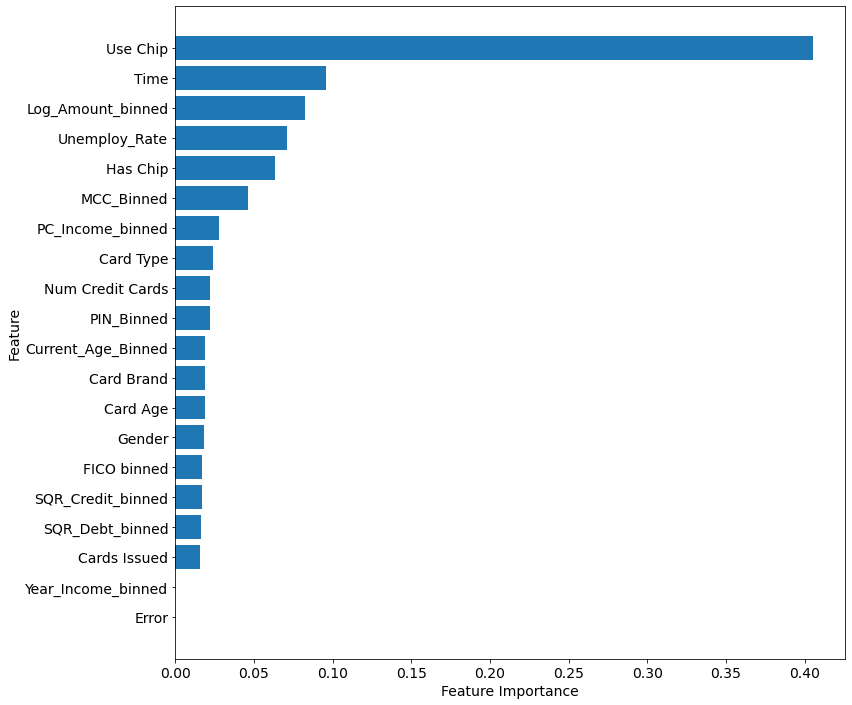

In [79]:
sorted_idx = model1.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], model1.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.savefig('XGBoost_Feature_Importance.png')

In [98]:
# xgboost - binned unemployment and label encoded transaction type (chip, swipe, online)
model = xgb.XGBClassifier().fit(X_train, y_train)

In [99]:
y_pred = model.predict(X_test)

In [100]:
confusion_matrix(y_test, y_pred)

array([[21520,   905],
       [ 1729,  4968]])

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     22425
         1.0       0.85      0.74      0.79      6697

    accuracy                           0.91     29122
   macro avg       0.89      0.85      0.87     29122
weighted avg       0.91      0.91      0.91     29122



In [80]:
# xgboost
model = xgb.XGBClassifier().fit(X_train, y_train)

In [81]:
y_pred = model.predict(X_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[14750,    87],
       [  672,  1293]])

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     14837
         1.0       0.94      0.66      0.77      1965

    accuracy                           0.95     16802
   macro avg       0.95      0.83      0.87     16802
weighted avg       0.95      0.95      0.95     16802



In [83]:
plt.rcParams.update({'figure.figsize': (12.0, 12.0)})
plt.rcParams.update({'font.size': 14})

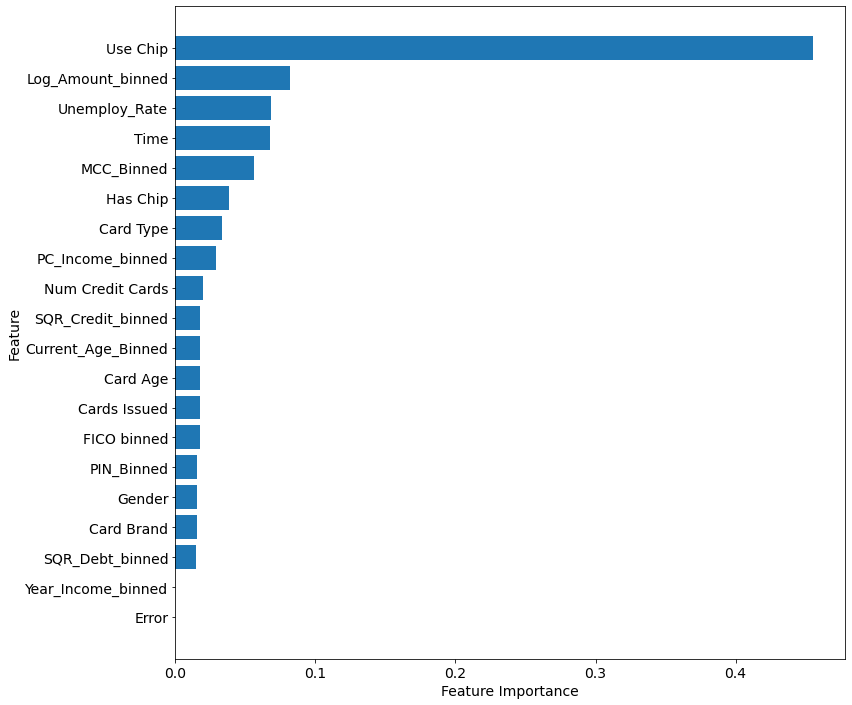

In [84]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.savefig('XGBoost_Feature_Importance.png')

In [32]:
# xgboost
model = xgb.XGBClassifier().fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[14750,    87],
       [  640,  1325]])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     14837
         1.0       0.94      0.67      0.78      1965

    accuracy                           0.96     16802
   macro avg       0.95      0.83      0.88     16802
weighted avg       0.96      0.96      0.95     16802



In [36]:
y_pred = model.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[14016,   821],
       [  358,  1607]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     14837
         1.0       0.66      0.82      0.73      1965

    accuracy                           0.93     16802
   macro avg       0.82      0.88      0.85     16802
weighted avg       0.94      0.93      0.93     16802



In [52]:
corr=X_train.corr()
high_corr_var=np.where(corr>0.2)
high_corr_var=[(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Card', 'Num Credit Cards'),
 ('Use Chip', 'Unemploy_Rate'),
 ('Num Credit Cards', 'FICO binned'),
 ('Num Credit Cards', 'Current_Age_Binned'),
 ('Card Brand', 'Card Type'),
 ('PC_Income_binned', 'SQR_Debt_binned'),
 ('PC_Income_binned', 'SQR_Credit_binned'),
 ('SQR_Debt_binned', 'SQR_Credit_binned')]